## Gradient Descent - Boston Dataset
Boston dataset is one of the datasets available in sklearn.
You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Gradient Descent algorithm and thus predictions for the test dataset given.
Your task is to:
    1. Code Gradient Descent for N features and come with predictions.
    2. Try and test with various combinations of learning rates and number of iterations.
    3. Try using Feature Scaling, and see if it helps you in getting better results. 
Read Instructions carefully -
    1. Use Gradient Descent as a training algorithm and submit results predicted.
    2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
    3. Submit a csv file with only predictions for X test data. File name should not have spaces. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form. 
    4. Your score is based on coefficient of determination.


In [3]:
import numpy as np
import pandas as pd

In [66]:
# Loading Datasets

train_dataset = np.genfromtxt("training_boston_x_y_train.csv", names = True, delimiter = ",")
train_df = pd.DataFrame(train_dataset)
print(train_df.describe())
num_cols = len(train_df.columns)
X_train = train_df.values[:, 0: num_cols -1 ]
Y_train = train_df.values[:, num_cols - 1]
print(X_train.shape)
print(Y_train.shape)

# print(X_train)
# print(Y_train)

test_dataset = np.genfromtxt("test_boston_x_test.csv", names = None, delimiter = ",")
test_df = pd.DataFrame(test_dataset)
print(test_df.describe())
num_cols = len(test_df.columns)
X_test = test_df.values

print(X_test.shape)

# print(X_train)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     0.019628    0.002455    0.036170    0.028955    0.028775    0.032202   
std      1.067490    1.000813    1.017497    1.048995    0.999656    1.001174   
min     -0.417713   -0.487722   -1.516987   -0.272599   -1.465882   -3.880249   
25%     -0.408171   -0.487722   -0.867691   -0.272599   -0.878475   -0.571480   
50%     -0.383729   -0.487722   -0.180458   -0.272599   -0.144217   -0.103479   
75%      0.055208    0.156071    1.015999   -0.272599    0.628913    0.529069   
max      9.941735    3.804234    2.422565    3.668398    2.732346    3.555044   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     0.038395   -0.001288    0.043307    0.043786    0.019218   -0.015785   
std      0.985209    1.0278

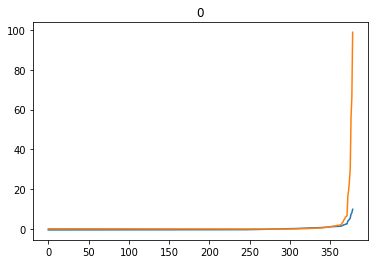

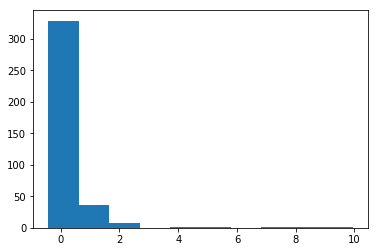

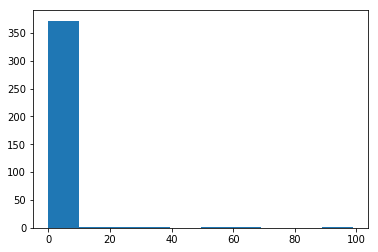

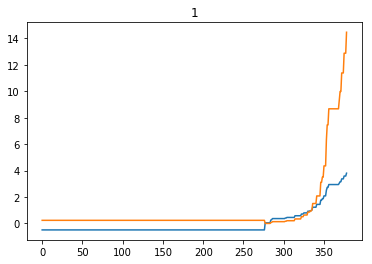

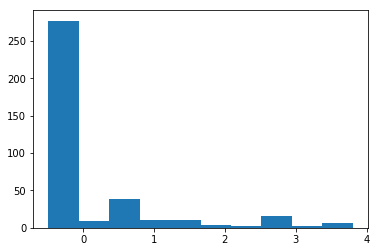

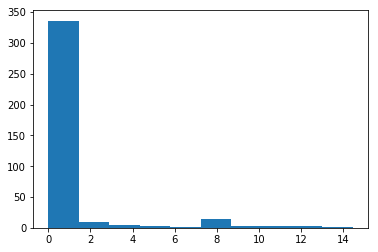

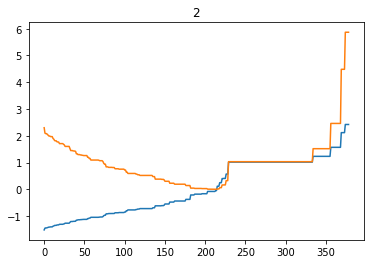

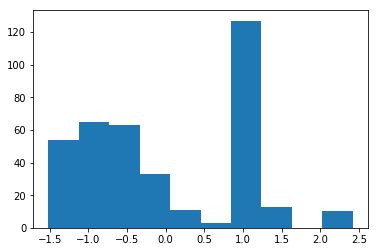

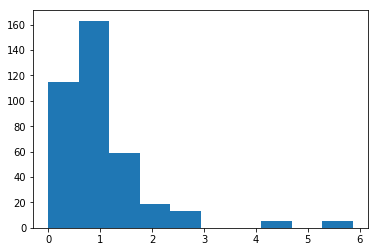

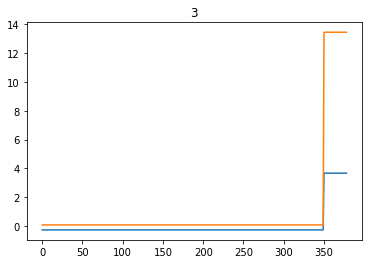

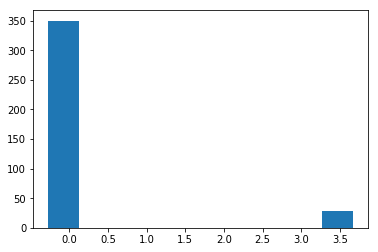

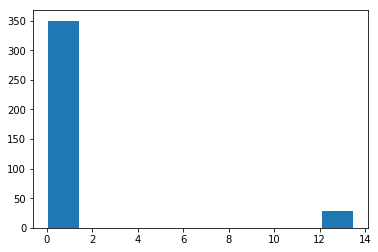

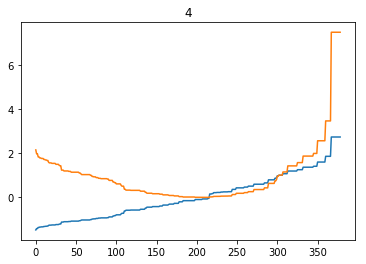

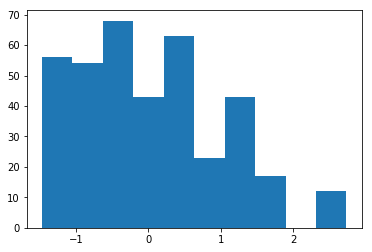

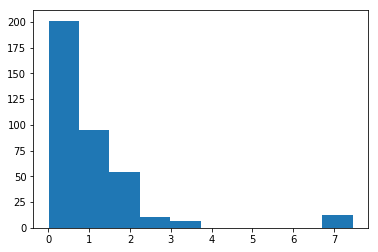

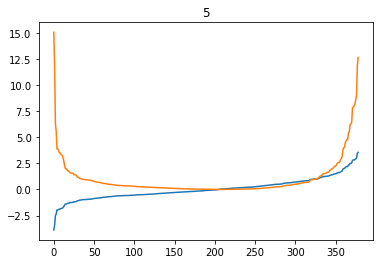

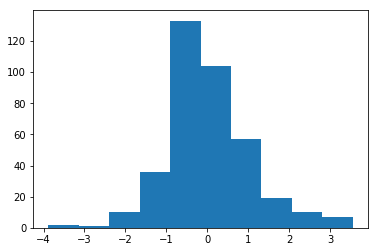

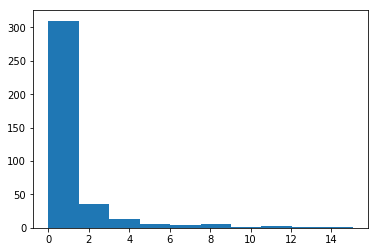

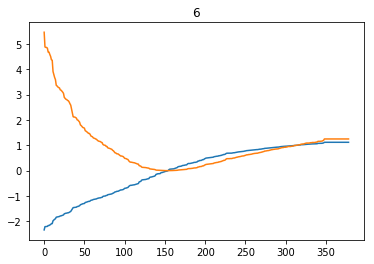

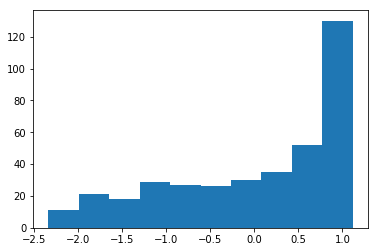

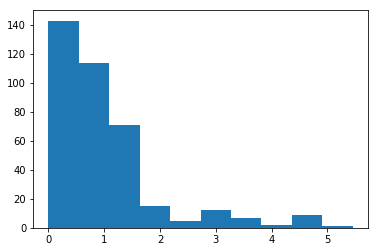

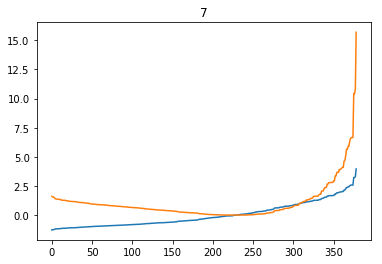

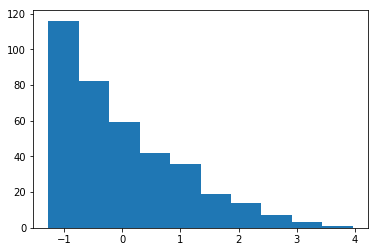

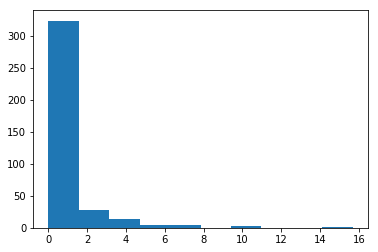

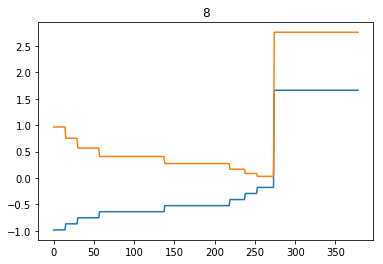

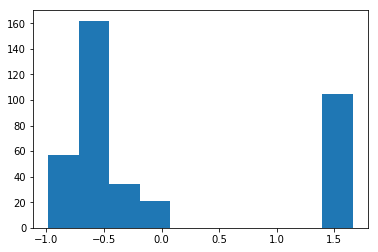

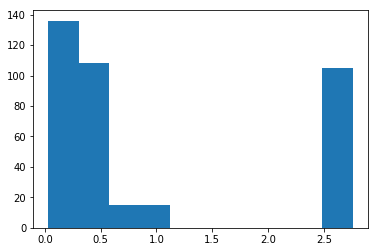

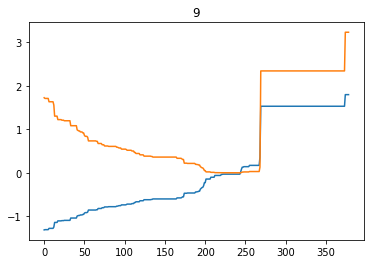

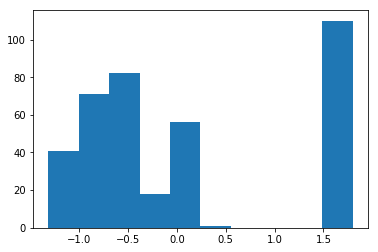

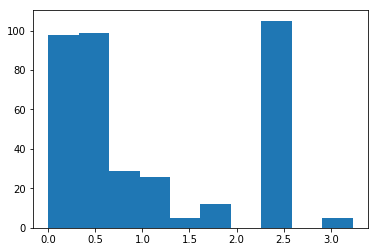

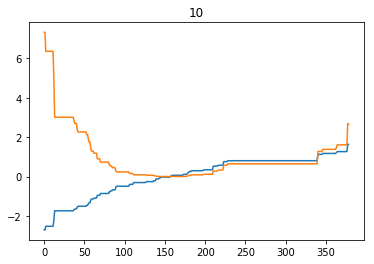

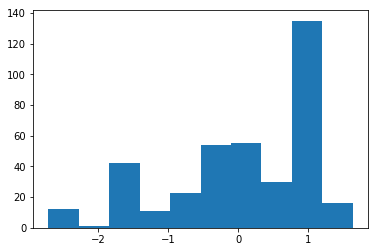

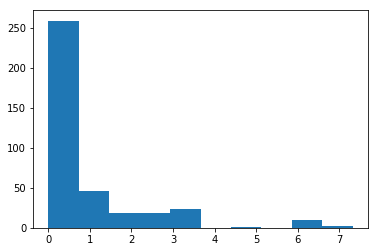

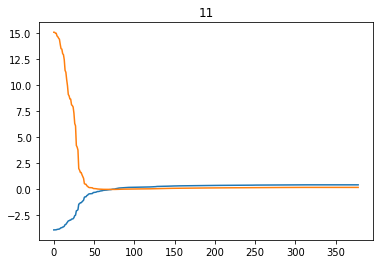

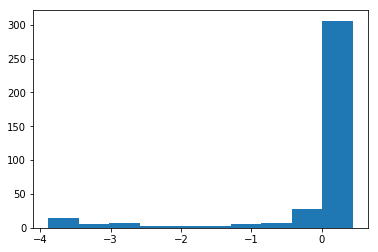

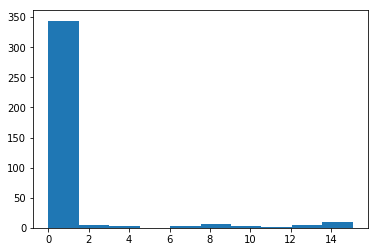

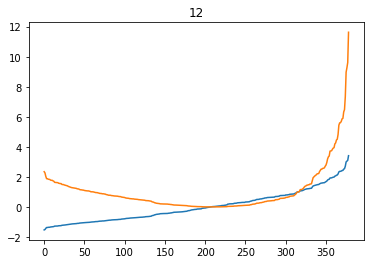

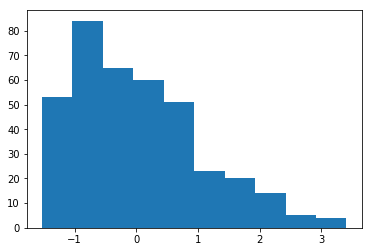

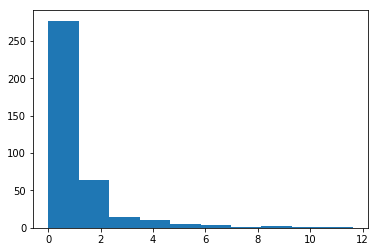

In [85]:
# plotting features
import copy
import matplotlib.pyplot as plt
for i in range(X_train.shape[1]) :
    x = copy.deepcopy(X_train[:, i])
    x.sort()
    plt.title(i)
    plt.plot(x)
    plt.plot(x**2)
    plt.show()
    plt.hist(x)
    plt.show()
    plt.hist(x**2)
    plt.show()

In [102]:
def single_step(X, Y, m, alpha):
    n_1 = len(m)
    num_eg = len(X)
    slope_m = np.zeros(n_1) 
    
    for j in range(n_1):
        for i in range(num_eg) :
            slope_m[j] += (-2/num_eg)* ((Y[i] - (m *(X[i])).sum() ) * X[i][j] )    
    #for j in range(n_1):
            m[j] -= alpha*slope_m[j]
    return m

def cost(X, Y, m):
    cost = 0
    num_eg = len(X)
    for i in range(num_eg) :
        cost += ((Y[i] - (m * X[i]).sum())**2 )/num_eg
    return cost

def gd(X, Y, alpha, num_iters):
    num_eg = len(X)
    X = np.c_[X, np.ones(X.shape[0])]
    m = np.zeros(len(X[0]))
    costs = {}
    print(len(m))
    for i in range(num_iters):
        m = single_step(X, Y, m, alpha)
        if i % 50 == 0 :
            costs[i] = cost(X, Y, m)
            print(i, " ", costs[i])
    import matplotlib.pyplot as plt
    keys = [key for key in costs]
    values = [costs[key] for key in costs]
    plt.plot(keys, values)
    plt.show()
    return m

def predict(X, m) :
    X = np.c_[X, np.ones(X.shape[0])]
    Y = np.array([])
    for i in range(len(X)):
        Y_i = (X[i] * m).sum()
        Y = np.append(Y, Y_i)
    return Y

def scale_features(X_train) :
    import copy
    X = copy.deepcopy(X_train)
    means = np.array([X[:, i].mean() for i in range(X.shape[1])])
    stds = np.array([X[:, i].std() for i in range(X.shape[1])])
    
    for i in range(X.shape[0]) :
        X[i, :] = (X[i, :] - means)/stds
    return X
def score(Y_true, Y_pred) :
    mean = Y_true.mean()
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - mean)**2).sum() 
    return 1 - (u/v)
# Introduce more features
def add_more_features (X_train, imp_cols_indices):
    X_train_df = pd.DataFrame(X_train)
    num_f = len(X_train_df.columns)
    col_names = X_train_df.columns
    new_df = X_train_df.copy()
    num_imp_cols = len(imp_col_indices)
    for i1 in range(num_imp_cols) :
        for j1 in range(i1, num_imp_cols):
            i = imp_cols_indices[i1]
            j = imp_cols_indices[j1]
            new_df[ str(col_names[i]) + "_" + str(col_names[j])] = X_train_df[i] * X_train_df[j]
    print(new_df.describe())
    return new_df.values

In [69]:
#scaled_X_train = scale_features(X_train)
#scaled_X_df = pd.DataFrame(scaled_X_train)
#scaled_X_df.describe()

                0           1           2           3           4           5  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     0.019628    0.002455    0.036170    0.028955    0.028775    0.032202   
std      1.067490    1.000813    1.017497    1.048995    0.999656    1.001174   
min     -0.417713   -0.487722   -1.516987   -0.272599   -1.465882   -3.880249   
25%     -0.408171   -0.487722   -0.867691   -0.272599   -0.878475   -0.571480   
50%     -0.383729   -0.487722   -0.180458   -0.272599   -0.144217   -0.103479   
75%      0.055208    0.156071    1.015999   -0.272599    0.628913    0.529069   
max      9.941735    3.804234    2.422565    3.668398    2.732346    3.555044   

                6           7           8           9     ...             4_4  \
count  379.000000  379.000000  379.000000  379.000000     ...      379.000000   
mean     0.038395   -0.001288    0.043307    0.043786     ...        0.997504   
std      0.985209    1.0278

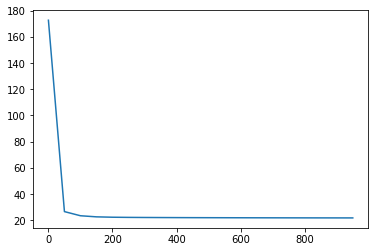

[-1.10275586  0.06540166 -0.43110753  0.76600326 -2.21025097  2.30493304
  0.05437628 -2.97390163  2.88055804 -1.56313308 -1.85555784  0.7042639
 -4.05356448  1.38917714 -0.07760382  0.95255245  0.70266983  1.19138801
  0.78512106 -1.83452766 -0.32937178 -0.54252944  1.09350069  1.27085186
 -1.18415541 -3.27419359  2.81661192 -0.66284143 20.77077699]
Duration:  95.55381512641907 second


In [116]:
imp_col_indices = [2, 4, 6, 8, 9]
import time
s_t = time.time()
X_train_new = add_more_features(X_train, imp_col_indices)
X_train_scaled = scale_features(X_train_new)
m = gd(X_train_new, Y_train, 0.0007, 1000)
print(m)
e_t = time.time()
print("Duration: ",e_t-s_t, "second")

In [117]:
X_test_new = add_more_features(X_test, imp_col_indices)
X_test_scaled = scale_features(X_test_new)
Y_pred = predict(X_test_new, m)
np.savetxt("boston_dataset_pred.csv", Y_pred, '%.5f')
print(score(Y_train, predict(X_train_new, m)))


                0           1           2           3           4           5  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean    -0.058575   -0.007327   -0.107939   -0.086410   -0.085871   -0.096098   
std      0.769837    1.005445    0.945672    0.839435    1.003998    0.998196   
min     -0.417173   -0.487722   -1.557842   -0.272599   -1.431329   -3.058221   
25%     -0.410832   -0.487722   -0.891036   -0.272599   -0.947582   -0.567918   
50%     -0.398269   -0.487722   -0.375976   -0.272599   -0.299707   -0.127698   
75%     -0.242900   -0.219475    1.015999   -0.272599    0.434551    0.283316   
max      3.966816    3.589637    2.117615    3.668398    2.732346    3.476688   

                6           7           8           9     ...             4_4  \
count  127.000000  127.000000  127.000000  127.000000     ...      127.000000   
mean    -0.114581    0.003845   -0.129240   -0.130670     ...        1.007449   
std      1.042254    0.9201